# Unsupervised Machine Learning-Task 3

#### The Aim is to predict the optimum number of clusters and represent it visually for the given iris dataset

In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [12]:
# Load the iris dataset
dataset=pd.read_csv("C:\\Users\\Ramya\\Desktop\\Untitled Folder\\iris.csv")

In [13]:
x=dataset.iloc[:, [0, 1, 2, 3]].values

In [14]:
# Find the optimal number of clusters with k-means classification
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state =42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

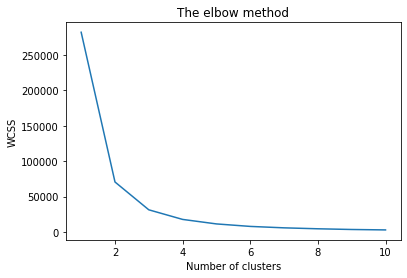

In [15]:
# plot the graph using the elbow method to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.The optimal clusters are 3.

In [16]:
# Fitting the Kmeans Algorithm with the number of clusters as 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 42)

In [17]:
y_kmeans = kmeans.fit_predict(x)

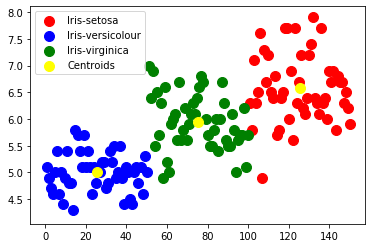

In [18]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [19]:
final=pd.DataFrame(dataset)
final.insert(6,'clusters',y_kmeans,True)
final

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0


#### The optimal number of clusters are 3 using the K-Means Algorithm